# A . Dataset & libraries

## libraries

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import  f1_score , confusion_matrix , accuracy_score
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import imageio

## Data set

### load

In [35]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
# Create a DataFrame from the iris data
df = pd.DataFrame(data=iris.data, columns=feature_names)

X.shape , y.shape


((150, 4), (150,))

### info

In [15]:
print(dir(iris))
print(iris.DESCR)


['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ==========

In [4]:
#print(dir(iris))
# print(*(f"{attr}: {getattr(iris, attr)}" for attr in dir(iris)), sep='\n')


### corr

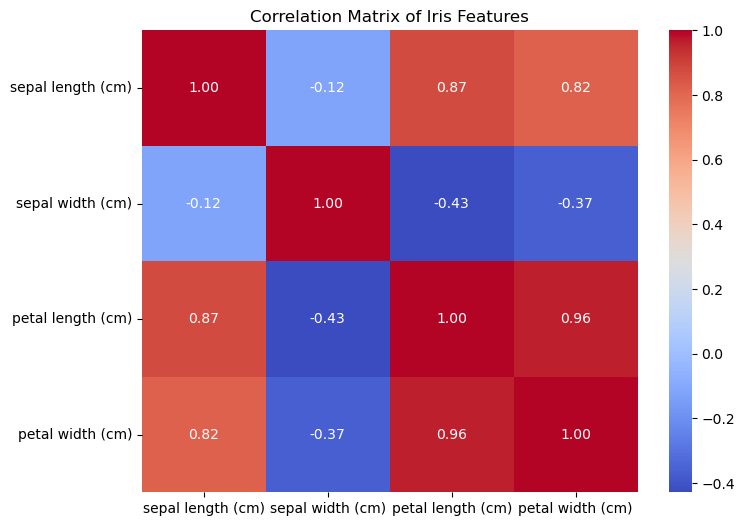

In [5]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Iris Features')
plt.show()

### pair plot


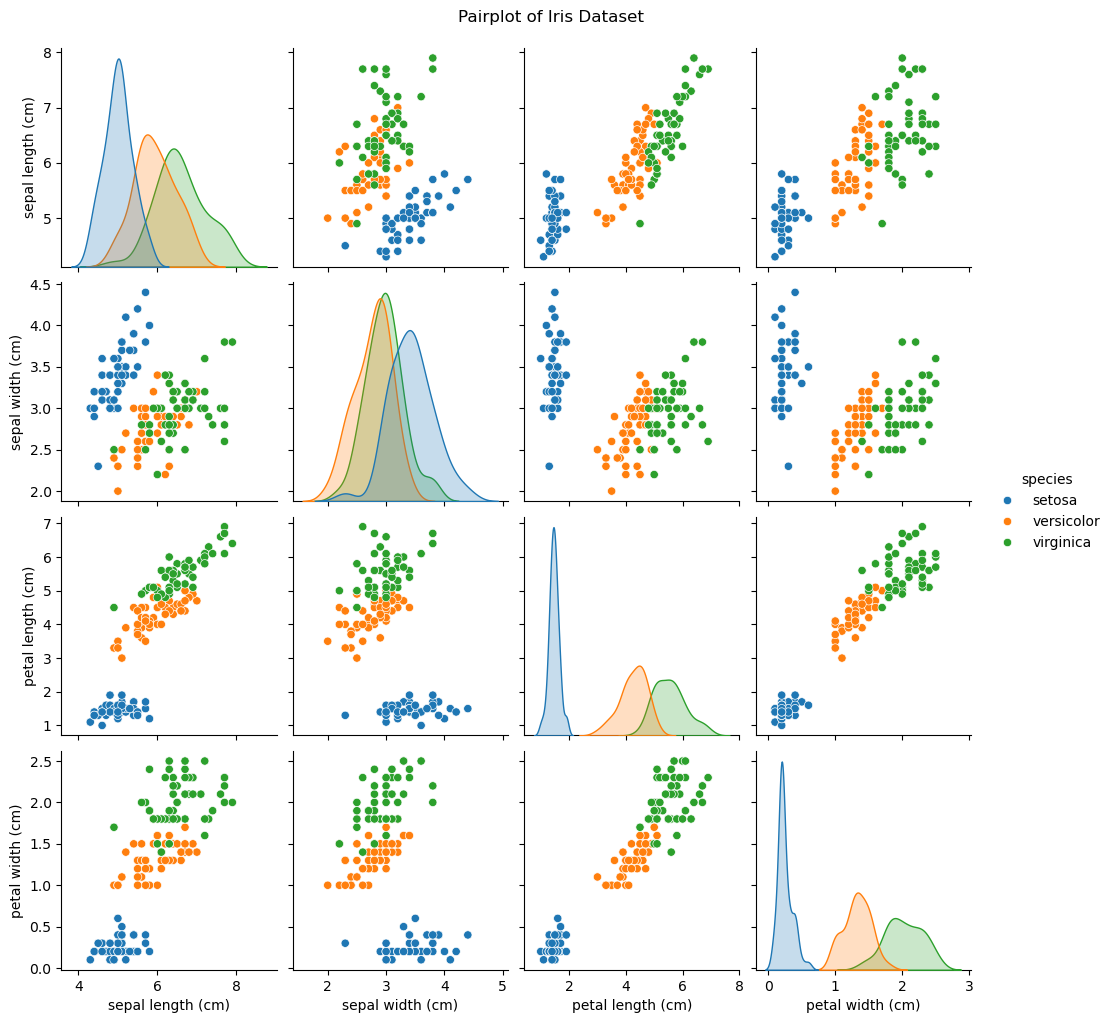

In [12]:
df['species'] = pd.Categorical.from_codes(y, target_names)
sns.pairplot(df,hue="species")
plt.suptitle('Pairplot of Iris Dataset', y=1.02)  # Adjust the title position
plt.show()

## Visualization 

## t-sne

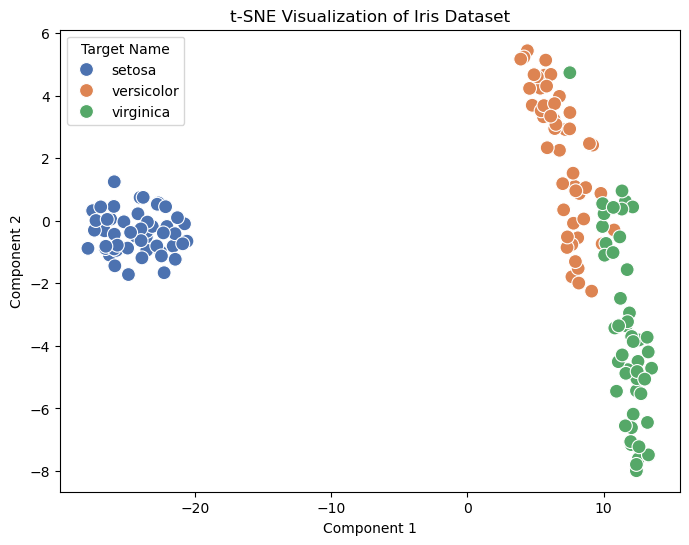

In [115]:
# Perform t-SNE
tsne = TSNE(n_components=2, random_state=24)
X_tsne = tsne.fit_transform(X)

# Create a DataFrame for the t-SNE data
df_tsne = pd.DataFrame(X_tsne, columns=['Component 1', 'Component 2'])
df_tsne['Target'] = y
df_tsne['Target Name'] = df_tsne['Target'].apply(lambda i: target_names[i])

# Plot the t-SNE results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='Component 1', y='Component 2', hue='Target Name', palette='deep', s=100)
plt.title('t-SNE Visualization of Iris Dataset')
plt.show()

## Pca

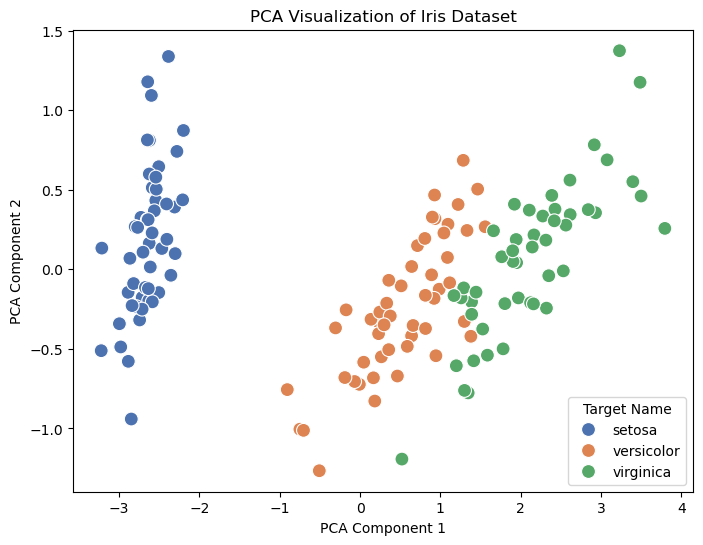

[0.92461872 0.05306648]


In [39]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
# Create a DataFrame for the PCA data
df_pca = pd.DataFrame(X_pca, columns=['PCA Component 1', 'PCA Component 2'])
df_pca['Target'] = y
df_pca['Target Name'] = df_pca['Target'].apply(lambda i: target_names[i])

# Plot the PCA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PCA Component 1', y='PCA Component 2', hue='Target Name', palette='deep', s=100)
plt.title('PCA Visualization of Iris Dataset')
plt.show()
print(explained_variance)

## LDA

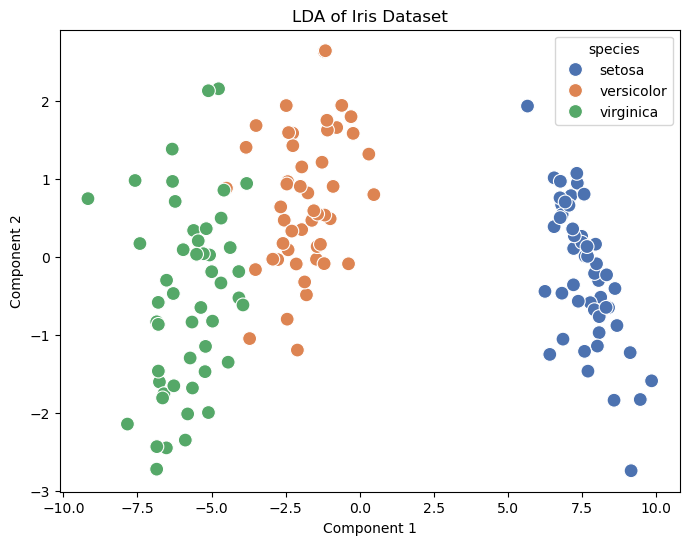

In [37]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X,y)

# Convert to DataFrame for easier plotting
df_lda = pd.DataFrame(X_lda, columns=['Component 1', 'Component 2'])
df_lda['species'] = pd.Categorical.from_codes(y, target_names)

# Plot the LDA results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_lda, x='Component 1', y='Component 2', hue='species', palette='deep', s=100)
plt.title('LDA of Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

## Droping features

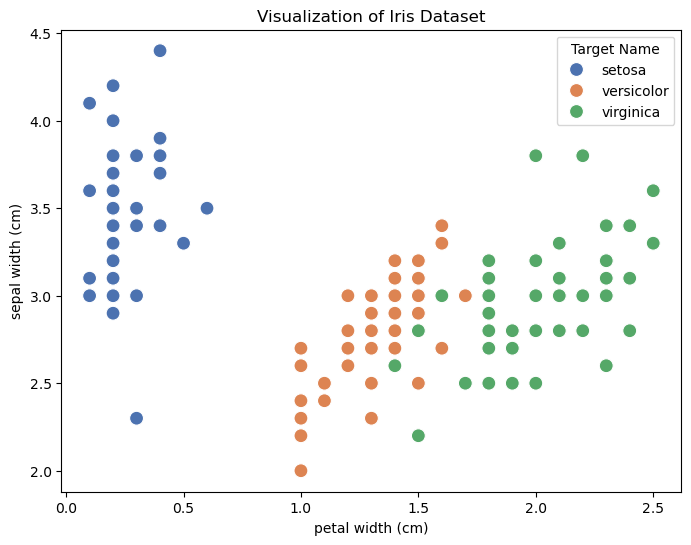

In [94]:
df_2=df.drop(['petal length (cm)','sepal length (cm)'],axis=1)  
df_2['Target'] = y
df_2['Target Name'] = df_2['Target'].apply(lambda i: target_names[i]) 
X_dropped = df_2.values
# Plot the drped results
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_2, x='petal width (cm)', y='sepal width (cm)', hue='Target Name', palette='deep', s=100)
plt.title('Visualization of Iris Dataset')
plt.show()

# B.

## svm

In [73]:

# Loading a sample dataset for the example
data = load_iris()
X = data.data
y = data.target

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [87]:
# Creating and training the SVM model with linear kernel
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
# Making predictions on the test set
y_pred = svm.predict(X_test)
print(svm.score(X_test,y_test))
# Calculating the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Printing the confusion matrix
print("Confusion Matrix of test data:")
print(cm)
#print(svm.support_vectors_)
print('weights : ',svm.coef_[0] , 'bias : ',svm.intercept_[0])


# confusion matrix for all data
y_pred_T = svm.predict(X_scaled)

# Calculating the confusion matrix
cm_T = confusion_matrix(y, y_pred_T)

# Printing the confusion matrix
print("Confusion Matrix of all data:")
print(cm_T)


0.9666666666666667
Confusion Matrix of test data:
[[10  0  0]
 [ 0  3  1]
 [ 0  0 16]]
weights :  [-0.46020088  0.33751306 -0.8639836  -0.93632798] bias :  -1.4759502026067934
Confusion Matrix of all data:
[[50  0  0]
 [ 0 45  5]
 [ 0  1 49]]


## Visualization

### PCA

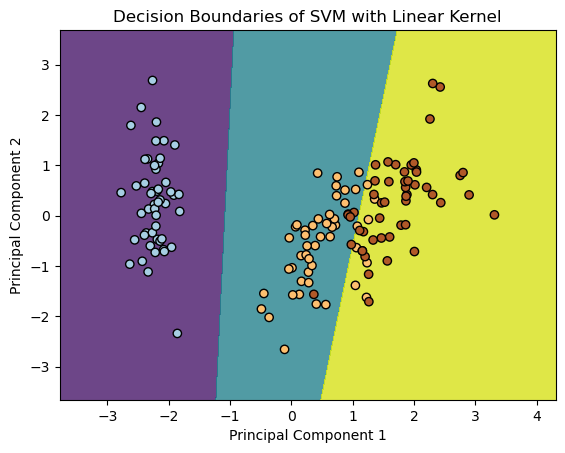

In [92]:
# Reducing the four features to two using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Now we visualize how the SVM makes decisions using just these two features
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Transform the mesh grid to PCA space
Z = svm.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of SVM with Linear Kernel')
plt.show()

### 2 features

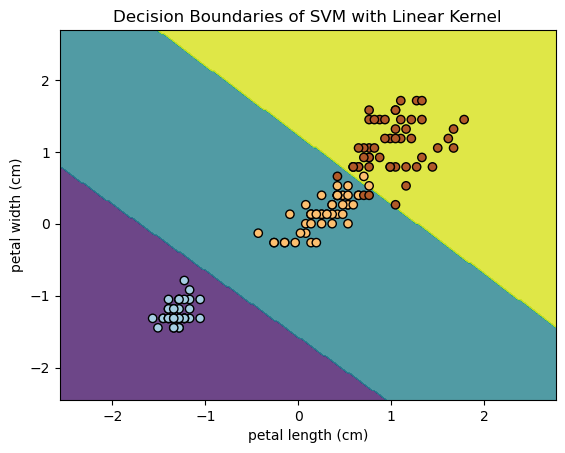

In [105]:

# Select the two most important features for visualization
feature1_index = 2  # Petal length in iris dataset 
feature2_index = 3  # Petal width in iris dataset

# Creating a mesh grid for plotting decision boundaries using the two selected features
x_min, x_max = X_scaled[:, feature1_index].min() - 1, X_scaled[:, feature1_index].max() + 1
y_min, y_max = X_scaled[:, feature2_index].min() - 1, X_scaled[:, feature2_index].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predicting the class for each point in the mesh grid
# We need to create a full feature array for prediction
Z = np.zeros(xx.ravel().shape)
for i, (x1, x2) in enumerate(zip(xx.ravel(), yy.ravel())):
    point = np.zeros(X.shape[1])
    point[feature1_index] = x1
    point[feature2_index] = x2
    Z[i] = svm.predict([point])

Z = Z.reshape(xx.shape)

# Plotting the decision boundaries and the data points
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_scaled[:, feature1_index], X_scaled[:, feature2_index], c=y, cmap=plt.cm.Paired, edgecolors='k')
plt.xlabel(data.feature_names[feature1_index])
plt.ylabel(data.feature_names[feature2_index])
plt.title('Decision Boundaries of SVM with Linear Kernel')
plt.show()

### with support vectors

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Loading a sample dataset (like our candy data)
data = load_iris()
X = data.data  # This has four features: sweetness, sourness, chewiness, and color
y = data.target  # This is the type of candy

# Scaling the data to make it consistent
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the SVM on the four features
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Reducing the four features to two using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Now we visualize how the SVM makes decisions using just these two features
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Transform the mesh grid to PCA space
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = svm.predict(pca.inverse_transform(mesh_points))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Identifying the support vectors and transforming them to PCA space
support_vectors = svm.support_vectors_
support_vectors_pca = pca.transform(support_vectors)

# Plotting the support vectors
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Decision Boundaries of SVM with Linear Kernel and Support Vectors')
plt.show()


# C

Best degree found by GridSearchCV: 1
Accuracy with best degree: 0.9667
Degree 1: Accuracy = 0.9667
Degree 2: Accuracy = 0.8667
Degree 3: Accuracy = 0.9667
Degree 4: Accuracy = 0.8333
Degree 5: Accuracy = 0.9333
Degree 6: Accuracy = 0.8667
Degree 7: Accuracy = 0.8667
Degree 8: Accuracy = 0.8000
Degree 9: Accuracy = 0.8333
Degree 10: Accuracy = 0.8000


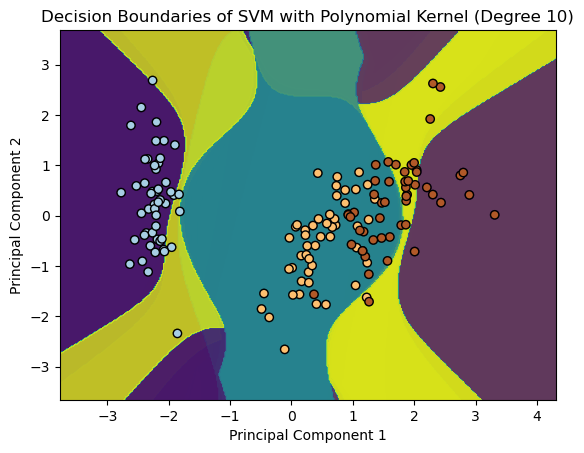

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import imageio.v2 as imageio

# Loading a sample dataset (like our candy data)
data = load_iris()
X = data.data
y = data.target

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=24)

# Apply PCA to reduce the dataset to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Define the SVM model and parameters for GridSearchCV
svm_poly = SVC(kernel='poly')
param_grid = {'degree': np.arange(1, 11)}
grid_search = GridSearchCV(svm_poly, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best degree found by GridSearchCV
best_degree = grid_search.best_params_['degree']
print(f"Best degree found by GridSearchCV: {best_degree}")

# Train and evaluate the model with the best degree
svm_best = SVC(kernel='poly', degree=best_degree)
svm_best.fit(X_train, y_train)
y_pred_best = svm_best.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best degree: {best_accuracy:.4f}")

# Plot decision boundaries for degrees 1 to 10
images = []
results = {}

for degree in range(1, 11):
    svm_poly = SVC(kernel='poly', degree=degree)
    svm_poly.fit(X_train, y_train)
    y_pred = svm_poly.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[degree] = accuracy
    print(f'Degree {degree}: Accuracy = {accuracy:.4f}')
    
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = svm_poly.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
    
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'Decision Boundaries of SVM with Polynomial Kernel (Degree {degree})')
    plt.savefig(f'degree_{degree}.png')
    images.append(imageio.imread(f'degree_{degree}.png'))

# Save GIF
imageio.mimsave('/home/amir/Machine_learning/HWs/HW_MiniProj#3/gif/svm_polynomial_degrees_with_support_vectors.gif', images,loop=5, fps=2)


# D

## 1 try

Training Accuracy: 96.67%
Test Accuracy: 93.33%


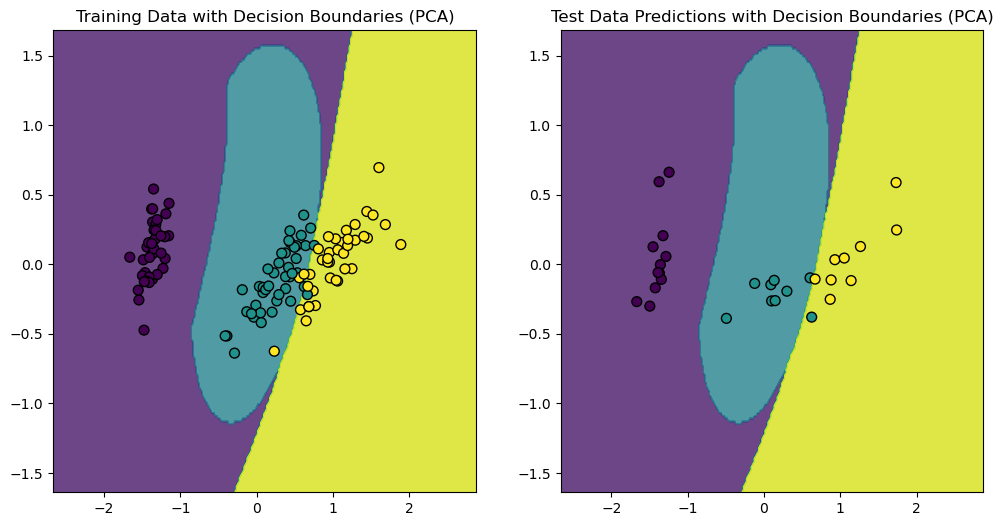

In [12]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X = (X - X.mean(axis=0)) / X.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def sigmoid_kernel(x, y, alpha=1, C=0.01):
    return np.tanh(alpha * np.dot(x, y) + C)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params = (kernel_type, poly_params, RBF_params, sigmoid_params, C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # Construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    
    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    
    # Support vectors have non-zero Lagrange multipliers
    sv = a > 1e-5  # Some small threshold
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv = len(sv_y)
    
    # Bias (For linear it is the intercept)
    bias = 0
    for n in range(len(a)):
        # For all support vectors
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    # Create the decision boundary for the plots. Calculates the hypothesis
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                # a: Lagrange multipliers, sv: support vectors
                # Hypothesis: sign(sum^S a * y * kernel + b)
                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type == 'RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s += a1 * sv_y1 * sigmoid_kernel(X_t[i], sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution, a, sv_x, sv_y, y_pred, kernel_and_params

def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch = {}  # Catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}
    
    # Step 3: Train binary SVM models for each required class combination
    for class_label in class_labels:
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(
            X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers
    
    return decision_function(X_t)

# Train SVM with all features
y_pred_train, kernel_and_params, w_catch, b_catch, classifiers = multiclass_svm(
    x_train, x_train, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)

y_pred_test, _, _, _, _ = multiclass_svm(
    x_train, x_test, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)

# Print training and test accuracy
train_accuracy = np.mean(y_pred_train == y_train)
test_accuracy = np.mean(y_pred_test == y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Use PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

grid_points = np.c_[xx.ravel(), yy.ravel()]
grid_points_original_space = pca.inverse_transform(grid_points)

# Predict the decision boundaries
_, _, _, _, classifiers = multiclass_svm(
    x_train, grid_points_original_space, y_train, C=1.0, kernel_type='RBF', RBF_params=0.5)

# Reshape the predictions to match the grid shape
Z = np.argmax(np.vstack([classifiers[class_label] for class_label in sorted(set(y_train))]), axis=0)
Z = Z.reshape(xx.shape)

# Visualize the results with decision boundaries
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.title('Training Data with Decision Boundaries (PCA)')

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_pred_test, cmap='viridis', edgecolor='k', s=50)
plt.title('Test Data Predictions with Decision Boundaries (PCA)')

plt.show()


## Answer

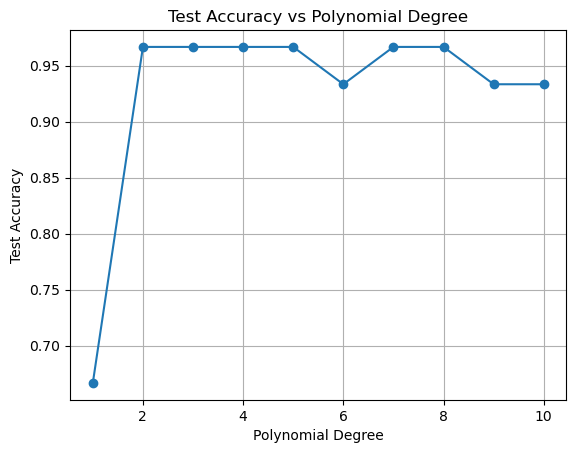

GIF saved as 'Q1D_polynomial_kernel_degrees.gif'
Accuracy for degrees 1 to 10:
Degree 1: 0.67
Degree 2: 0.97
Degree 3: 0.97
Degree 4: 0.97
Degree 5: 0.97
Degree 6: 0.93
Degree 7: 0.97
Degree 8: 0.97
Degree 9: 0.93
Degree 10: 0.93


In [23]:
# Import necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import cvxopt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
#import imageio
import imageio.v2 as imageio
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X = (X - X.mean(axis=0)) / X.std()

# Shuffle the data
np.random.seed(1234)
indices = np.random.permutation(len(y))
X = X[indices]
y = y[indices]

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, C=1.0, d=3):
    return (np.dot(x, y) + C) ** d

def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)

def sigmoid_kernel(x, y, alpha=1, C=0.01):
    return np.tanh(alpha * np.dot(x, y) + C)

def SVM1(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    kernel_and_params = (kernel_type, poly_params, RBF_params, sigmoid_params, C)
    n_samples, n_features = X.shape
    # Compute the Gram matrix
    K = np.zeros((n_samples, n_samples))
    if kernel_type == 'linear':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = linear_kernel(X[i], X[j])
    elif kernel_type == 'polynomial':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = polynomial_kernel(X[i], X[j], poly_params[0], poly_params[1])
    elif kernel_type == 'RBF':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = gaussian_kernel(X[i], X[j], RBF_params)
    elif kernel_type == 'sigmoid':
        for i in range(n_samples):
            for j in range(n_samples):
                K[i, j] = sigmoid_kernel(X[i], X[j], sigmoid_params[0], sigmoid_params[1])
    else:
        raise ValueError("Invalid kernel type")

    # Construct P, q, A, b, G, h matrices for CVXOPT
    P = cvxopt.matrix(np.outer(y, y) * K)
    q = cvxopt.matrix(np.ones(n_samples) * -1)
    A = cvxopt.matrix(y, (1, n_samples))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.vstack((np.diag(np.ones(n_samples) * -1), np.identity(n_samples))))
    h = cvxopt.matrix(np.hstack((np.zeros(n_samples), np.ones(n_samples) * C)))
    
    # Solve QP problem
    cvxopt.solvers.options['show_progress'] = False
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    # Lagrange multipliers
    a = np.ravel(solution['x'])
    
    # Support vectors have non-zero Lagrange multipliers
    sv = a > 1e-5  # Some small threshold
    ind = np.arange(len(a))[sv]
    a = a[sv]
    sv_x = X[sv]
    sv_y = y[sv]
    numbers_of_sv = len(sv_y)
    
    # Bias (For linear it is the intercept)
    bias = 0
    for n in range(len(a)):
        # For all support vectors
        bias += sv_y[n]
        bias -= np.sum(a * sv_y * K[ind[n], sv])
    bias = bias / len(a)

    # Weight vector
    if kernel_type == 'linear':
        w = np.zeros(n_features)
        for n in range(len(a)):
            w += a[n] * sv_y[n] * sv_x[n]
    else:
        w = None

    # Create the decision boundary for the plots. Calculates the hypothesis
    if w is not None:
        y_pred = np.sign(np.dot(X_t, w) + bias)
    else:
        y_predict = np.zeros(len(X_t))
        for i in range(len(X_t)):
            s = 0
            for a1, sv_y1, sv1 in zip(a, sv_y, sv_x):
                # a: Lagrange multipliers, sv: support vectors
                # Hypothesis: sign(sum^S a * y * kernel + b)
                if kernel_type == 'linear':
                    s += a1 * sv_y1 * linear_kernel(X_t[i], sv1)
                if kernel_type == 'RBF':
                    s += a1 * sv_y1 * gaussian_kernel(X_t[i], sv1, RBF_params)
                if kernel_type == 'polynomial':
                    s += a1 * sv_y1 * polynomial_kernel(X_t[i], sv1, poly_params[0], poly_params[1])
                if kernel_type == 'sigmoid':
                    s += a1 * sv_y1 * sigmoid_kernel(X_t[i], sv1, sigmoid_params[0], sigmoid_params[1])
            y_predict[i] = s
        y_pred = np.sign(y_predict + bias)

    return w, bias, solution, a, sv_x, sv_y, y_pred, kernel_and_params

def multiclass_svm(X, X_t, y, C, kernel_type, poly_params=(1, 4), RBF_params=0.5, sigmoid_params=(1, 0.01)):
    # Step 1: Identify unique class labels
    class_labels = list(set(y))

    # Step 2: Initialize classifiers dictionary
    classifiers = {}
    w_catch = {}  # Catching w, b only for plot part
    b_catch = {}
    a_catch = {}
    sv_x_catch = {}
    sv_y_catch = {}
    
    # Step 3: Train binary SVM models for each required class combination
    for class_label in class_labels:
        # Create binary labels for current class vs. all others
        binary_y = np.where(y == class_label, 1.0, -1.0)
        # Train SVM classifier for binary classification
        w, bias, _, a, sv_x, sv_y, prediction, kernel_and_params = SVM1(
            X, X_t, binary_y, C, kernel_type, poly_params, RBF_params, sigmoid_params)
        classifiers[class_label] = prediction
        w_catch[class_label] = w
        b_catch[class_label] = bias
        a_catch[class_label] = a
        sv_x_catch[class_label] = sv_x
        sv_y_catch[class_label] = sv_y

    def decision_function(X_t):
        decision_scores = np.zeros((X_t.shape[0], len(class_labels)))
        for i, label in enumerate(class_labels):
            decision_scores[:, i] = classifiers[label]
        return np.argmax(decision_scores, axis=1), kernel_and_params, w_catch, b_catch, classifiers
    
    return decision_function(X_t)

# Use PCA for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Store the images for the GIF
images = []
accuracies = []

for degree in range(1, 11):
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_original_space = pca.inverse_transform(grid_points)

    # Predict the decision boundaries
    _, _, _, _, classifiers = multiclass_svm(
        x_train, grid_points_original_space, y_train, C=1.0, kernel_type='polynomial', poly_params=(1, degree))

    # Reshape the predictions to match the grid shape
    Z = np.argmax(np.vstack([classifiers[class_label] for class_label in sorted(set(y_train))]), axis=0)
    Z = Z.reshape(xx.shape)

    # Visualize the results with decision boundaries
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
    ax.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
    ax.set_title(f'Training Data with Decision Boundaries (PCA) - Degree {degree}')

    # Save the figure
    plt.savefig(f'Q1D_degree_{degree}.png')
    images.append(imageio.imread(f'degree_{degree}.png'))
    plt.close(fig)

    # Evaluate accuracy
    y_pred_test, _, _, _, _ = multiclass_svm(
        x_train, x_test, y_train, C=1.0, kernel_type='polynomial', poly_params=(1, degree))
    test_accuracy = np.mean(y_pred_test == y_test)
    accuracies.append(test_accuracy)

# Create GIF
imageio.mimsave('/home/amir/Machine_learning/HWs/HW_MiniProj#3/gif/Q1D_polynomial_kernel_degrees.gif.gif',
                 images,loop=5, fps=2)

# Plot accuracy for different degrees
plt.figure()
plt.plot(range(1, 11), accuracies, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs Polynomial Degree')
plt.grid(True)
plt.show()

print("GIF saved as 'Q1D_polynomial_kernel_degrees.gif'")
print("Accuracy for degrees 1 to 10:")
for degree, accuracy in enumerate(accuracies, start=1):
    print(f"Degree {degree}: {accuracy:.2f}")